# The GRIP- Sparks Foundation 
# Task 2: Linear Regression

Simple linear regression involving two variables (Hours and Scores). To predict the percentage of marks that a student is expected to score based upon the number of hours they studied. Also, what will be predicted score if a student study for 9.25 hrs in a day?

**Importing the libraries required**

In [12]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

**Reading the data from URL**

In [7]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported")
data.head(10)

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Exploring numeric variables**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 440.0 bytes


**Plotting the distribution of scores w.r.t hours and its correlation**

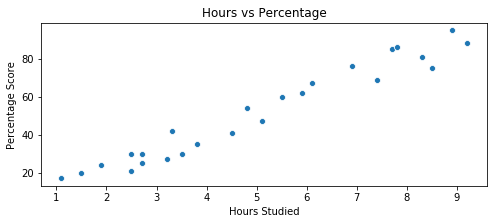

In [9]:
plt.figure(figsize=(8,3))
sns.scatterplot(x='Hours',y='Scores',data =data)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

We can see the % scores increasing with respect to hours studied. It is a positive linear regression.

In [14]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The high correlation betwwen scores and hours, indicating that the variable hours is a good predictor of scores.

**Transforming the data**

Separating the input and target variables into X and Y

In [13]:
x = data[['Hours']]
y = data['Scores']

**Splitting data between train and test**

In [16]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

**Training the data**

In [17]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Finding intercept & coeffecient. Plotting regression line**

In [18]:
b1 = lr.coef_
b1

array([9.91065648])

In [20]:
b0 = lr.intercept_
b0

2.018160041434669

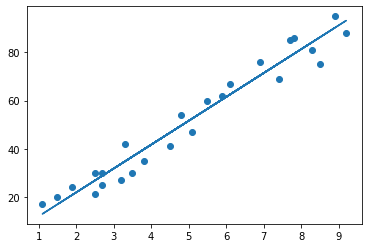

In [22]:
line = b1*x+b0
plt.scatter(x, y)
plt.plot(x, line)  #test data
plt.show()

**Making Predictions**

In [24]:
print(x_test)
y_pred = lr.predict(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


**Comparing actual vs predicted**

In [25]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


# What will be predicted score if a student studies for 9.25 hrs in a day?

In [52]:
hour= 9.25
task= lr.predict(np.array(hour).reshape(-1,1))
print("No of Hours = {}".format(hour))
print("Predicted Score = {}".format(task[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


**Evaluating the model**

In [53]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.18385989900298


Here we can see that the algorithm has predicted that if a student studies for 9.25 hours in a day he can score 93.69% with 4.18 MAE.